<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/15_nn_multi_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NN 다중분류(흑백)
- **mnist 데이터셋**
  - **목표: 0~9로 구성된 흑백 숫자를 구분하는 것**

In [3]:
!pip install --q ipython-autotime
%load_ext autotime

time: 2.48 ms (started: 2024-07-08 02:22:26 +00:00)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

time: 6.06 s (started: 2024-07-08 02:23:42 +00:00)


In [5]:
## 1. 데이터 준비

time: 243 µs (started: 2024-07-08 02:23:59 +00:00)


In [6]:
# ! wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

--2024-07-08 02:24:00--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  --.-KB/s    in 0.09s   

2024-07-08 02:24:00 (126 MB/s) - ‘mnist.npz’ saved [11490434/11490434]

time: 206 ms (started: 2024-07-08 02:24:00 +00:00)


**-npz 파일 불러오기**

In [7]:
mnist= np.load('mnist.npz')
type(mnist)

numpy.lib.npyio.NpzFile

time: 53.5 ms (started: 2024-07-08 02:24:08 +00:00)


- **데이터에 이미 전처리가 완료되어 있어 x_test, x_train, y_train, y_test 로 저장되어 있음**

In [8]:
mnist

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test

time: 7.74 ms (started: 2024-07-08 02:25:01 +00:00)


**- 데이터 스플릿**

In [9]:
X_train = mnist['x_train']
X_test = mnist['x_test']
y_train = mnist['y_train']
y_test = mnist['y_test']

time: 375 ms (started: 2024-07-08 02:25:08 +00:00)


In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 흑백 이미지라 채널이 없다.
print(type(X_train),type(X_test))

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 4.69 ms (started: 2024-07-08 02:25:24 +00:00)


In [11]:
X_train.ndim

3

time: 3.1 ms (started: 2024-07-08 02:25:27 +00:00)


In [12]:
print(type(y_train),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 1.02 ms (started: 2024-07-08 02:25:28 +00:00)


## 2. 데이터 확인

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

time: 4.29 ms (started: 2024-07-08 02:25:59 +00:00)


In [14]:
np.random.seed(42)
sample = np.random.randint(60000,size=25)
sample # 6000만개의 데이터 중 25 가지 뽑인 INDEX값을 가짐

array([56422, 15795,   860, 38158, 54343, 44732, 11284, 54886,  6265,
       16850, 37194, 21962, 47191, 44131, 16023, 41090,  1685,   769,
       59735, 56101,  2433,  5311, 37819, 39188, 17568])

time: 4.33 ms (started: 2024-07-08 02:26:00 +00:00)


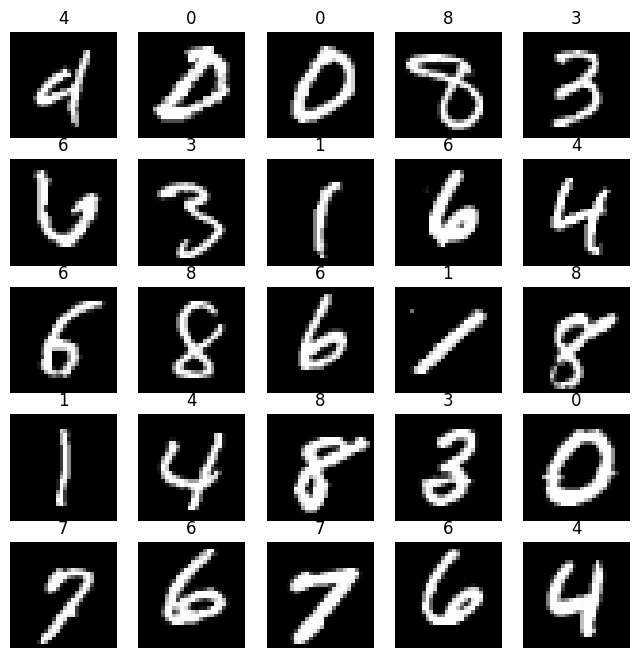

time: 3.19 s (started: 2024-07-08 02:26:07 +00:00)


In [15]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_train[idx],cmap='gray')
  plt.title(y_train[idx]) # 정답값 표시
  plt.axis('off')
plt.show()


**y_train 이 넘파이 배열 1차원 벡터라 데이터프레임 형태로 변환 시킨 배열을 저장해서 데이터 탐색**

In [19]:
sr=pd.Series(y_train).value_counts().sort_index()

time: 19.8 ms (started: 2024-07-08 02:28:18 +00:00)


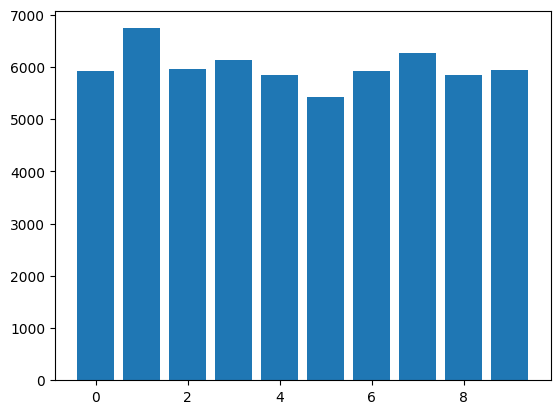

time: 591 ms (started: 2024-07-08 02:28:18 +00:00)


In [20]:
plt.bar(sr.index,sr)
plt.show()

## 학습용, 검증용 데이터 분리

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid= train_test_split(X_train,y_train,test_size=0.2,random_state=42)

time: 276 ms (started: 2024-07-08 02:32:37 +00:00)


In [22]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
print(type(X_train),type(y_train))

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 789 µs (started: 2024-07-08 02:32:40 +00:00)


## 4.데이터 (전)처리
- X값은 스케일링
- y값은 원핫인코딩

In [23]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  17,  47,  47,  47,  47,  47,  47,
         28,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  63,   0,   0,
          0,  62, 138, 197, 197, 197, 217, 253, 253, 253, 253, 253, 253,
        230,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 170,   0,  56,
        232, 250, 253, 231, 217, 217, 217, 217, 217, 217, 217, 128, 179,
        132,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 104, 251, 170,  20, 233,
        253, 199,  84,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 203, 253, 160,   3,  20,
         20,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77, 253, 228,  21,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 150, 253, 249, 223, 223, 193,
         71,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 253, 253, 253, 253,
        253, 196, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 202, 191, 144, 144, 217,
        251, 253, 253, 170,   4,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53, 236, 253, 253, 215,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  34, 180, 253, 253, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2, 140, 253, 236,  36,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37,   0,   0,   0,   0,   0,
          0,   0,   0,  13, 215, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 246,  53,   0,   0,   0,   0,
          0,   0,   0,   0, 105, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254,  57,   0,   0,   0,   0,
          0,   0,   0,   0,  99, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,  65,   0,   0,   0,   0,
          0,   0,   0,  35, 217, 253,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 227, 223, 115,  18,   0,   0,
          5,  68, 113, 222, 253, 242,  46,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  41, 224, 253, 227, 218, 218,
        220, 253, 253, 253, 249,  76,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 150, 215, 253, 253,
        253, 253, 205, 175,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

time: 17.7 ms (started: 2024-07-08 02:32:44 +00:00)


In [24]:
# from sklearn.preprocessing import MinMaxScaler # 이미지 데이터의 min=0 , max=255이므로 min_maxscaler
# mm = MinMaxScaler()


time: 296 µs (started: 2024-07-08 02:33:21 +00:00)


In [25]:
# Min_Max Scalling
X_train_s= X_train/255.
X_valid_s= X_valid/255.

time: 228 ms (started: 2024-07-08 02:33:21 +00:00)


In [28]:
X_train_s.shape

(48000, 28, 28)

time: 8.87 ms (started: 2024-07-08 02:33:55 +00:00)


In [29]:
X_train_s[0] # 위에 이미지 5가 0과 1 사이의 값으로 변함

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

time: 32.8 ms (started: 2024-07-08 02:34:32 +00:00)


In [30]:
from keras import utils
y_train_o= utils.to_categorical(y_train)
y_valid_o = utils.to_categorical(y_valid)

time: 5.35 ms (started: 2024-07-08 02:34:39 +00:00)


In [31]:
y_train_o.shape, y_valid_o.shape

((48000, 10), (12000, 10))

time: 3.9 ms (started: 2024-07-08 02:34:40 +00:00)


In [ ]:
print(y_train[:10])
y_train[:10]

[5 0 1 6 1 3 8 8 1 8]


array([5, 0, 1, 6, 1, 3, 8, 8, 1, 8], dtype=uint8)

time: 11.4 ms (started: 2024-07-01 01:32:03 +00:00)


In [32]:
print(X_train_s.shape, X_valid_s.shape)
print(y_train_o.shape, y_valid_o.shape)


(48000, 28, 28) (12000, 28, 28)
(48000, 10) (12000, 10)
time: 2.85 ms (started: 2024-07-08 02:34:43 +00:00)


## 5. 모델 학습

-**1차원으로 flatten 시켜야 함.**


In [33]:
X_train_s = X_train_s.reshape(-1,28*28) # 1차원으로 flatten 시켜야 함.
X_valid_s = X_valid_s.reshape(-1,28*28)

time: 615 µs (started: 2024-07-08 02:35:18 +00:00)


In [34]:
print(X_train_s.shape, y_train_o.shape)

(48000, 784) (48000, 10)
time: 660 µs (started: 2024-07-08 02:35:21 +00:00)


In [40]:
from keras import models, layers

model = keras.Sequential([
    layers.Dense(units=64,activation='relu',input_shape=(784,)),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=10,activation='softmax'),

])

time: 151 ms (started: 2024-07-08 03:50:01 +00:00)


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 46.4 ms (started: 2024-07-08 03:50:02 +00:00)


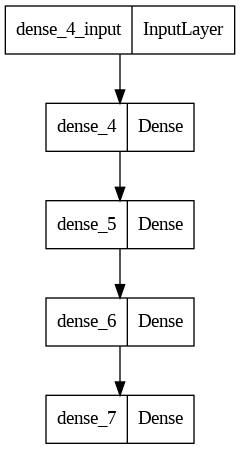

time: 154 ms (started: 2024-07-08 03:50:05 +00:00)


In [42]:
utils.plot_model(model)

In [43]:
adam = keras.optimizers.Adam(learning_rate=0.01) # tuning
model.compile(loss= 'categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

time: 44.2 ms (started: 2024-07-08 03:50:07 +00:00)


In [44]:
EPOCH=30
BATCH_SIZE = 64

history = model.fit(X_train_s,y_train_o,
                    epochs=EPOCH,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid_s,y_valid_o))

Epoch 1/30
750/750 [==============================] - 7s 6ms/step - loss: 0.3031 - accuracy: 0.9099 - val_loss: 0.1760 - val_accuracy: 0.9460
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1624 - accuracy: 0.9529 - val_loss: 0.1542 - val_accuracy: 0.9549
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1377 - accuracy: 0.9609 - val_loss: 0.1674 - val_accuracy: 0.9538
Epoch 4/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1251 - accuracy: 0.9655 - val_loss: 0.1431 - val_accuracy: 0.9585
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1138 - accuracy: 0.9685 - val_loss: 0.1536 - val_accuracy: 0.9632
Epoch 6/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0991 - accuracy: 0.9716 - val_loss: 0.1339 - val_accuracy: 0.9649
Epoch 7/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0922 - accuracy: 0.9743 - val_loss: 0.1450 - val_accuracy: 0.9639
Epoch 

*** 훈련과정 시각화***

In [45]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

time: 1.1 ms (started: 2024-07-08 04:06:59 +00:00)


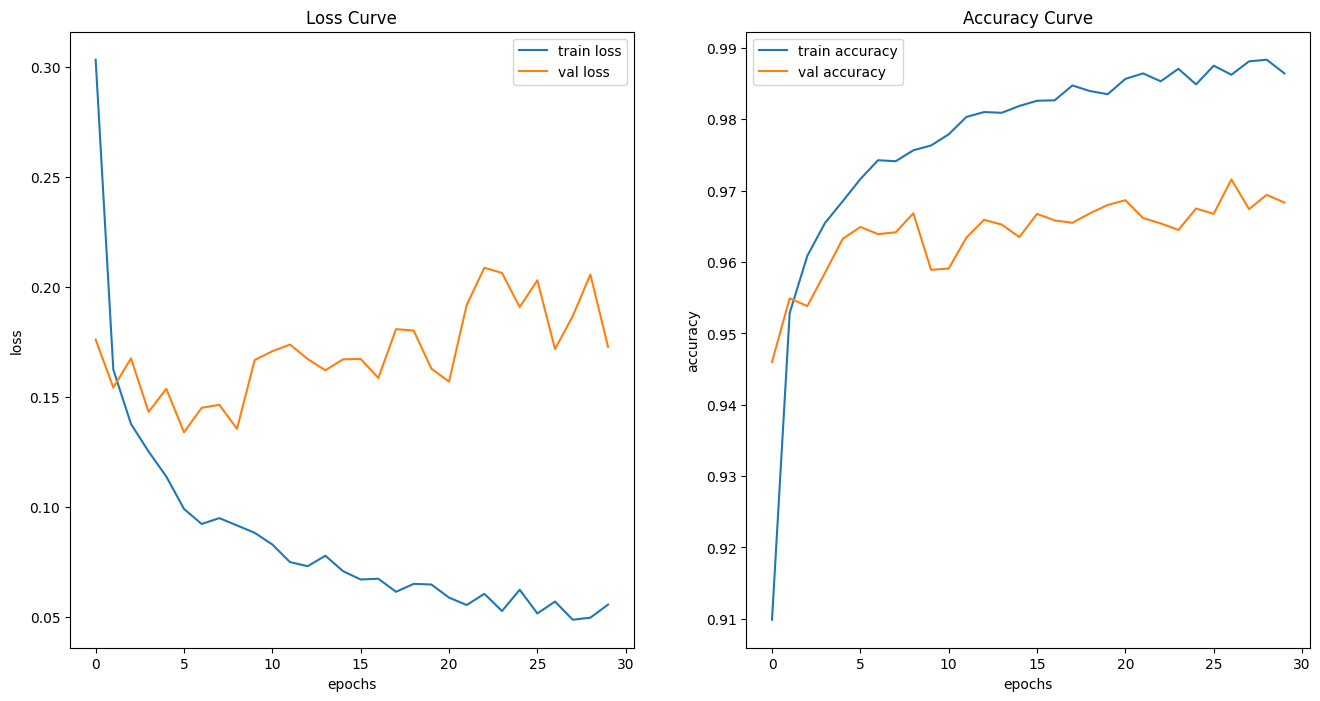

time: 1.02 s (started: 2024-07-08 04:07:03 +00:00)


In [46]:
plot_history(history)

## 6. 모델 평가

In [53]:
X_test_s = X_test/ 255.
X_test_s= X_test_s.reshape(-1,28*28)
y_test_o= utils.to_categorical(y_test)

time: 29.8 ms (started: 2024-07-08 04:07:54 +00:00)


In [54]:
X_test_s.shape, y_test_o.shape

((10000, 784), (10000, 10))

time: 4.33 ms (started: 2024-07-08 04:07:55 +00:00)


In [55]:
y_pred = model.predict(X_test_s)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([[1.2151756e-16, 1.5681305e-04, 2.9533269e-04, 4.4092505e-07,
        4.1792236e-09, 1.7486702e-10, 0.0000000e+00, 9.9954230e-01,
        1.2436060e-12, 4.9649557e-06],
       [2.4280463e-11, 6.8960020e-07, 9.9992365e-01, 6.8039452e-07,
        2.2047799e-09, 2.8123381e-10, 2.5012286e-08, 6.8669950e-05,
        6.1740802e-06, 1.3092562e-29],
       [0.0000000e+00, 9.9999994e-01, 2.1625348e-17, 7.5348188e-23,
        2.3288806e-20, 7.8706230e-22, 2.0554587e-26, 2.3670228e-08,
        2.4348265e-11, 9.1877889e-17],
       [9.9999994e-01, 0.0000000e+00, 1.5815493e-14, 6.7747146e-36,
        1.4818493e-31, 1.4539893e-12, 5.4939642e-10, 2.5553348e-14,
        9.2997279e-13, 6.3399642e-17],
       [2.1888159e-20, 4.9413138e-19, 9.8888584e-22, 9.9695384e-29,
        9.9999994e-01, 2.3202977e-19, 2.7047494e-17, 3.8371774e-13,
        5.1771464e-20, 7.8872056e-09],
       [0.0000000e+00, 9.9999994e-01, 5.7894898e-19, 1.3582555e-24,
        1.0935451e-21, 3.6454073e-23, 1.2222109e-21, 2.33

time: 1.38 s (started: 2024-07-08 04:07:56 +00:00)


In [56]:
y_pred = np.argmax(y_pred,axis=1)
y_pred[:5]

array([7, 2, 1, 0, 4])

time: 4.58 ms (started: 2024-07-08 04:08:00 +00:00)


In [57]:
y_test_o = np.argmax(y_test_o,axis=1)
y_test_o[:5]

array([7, 2, 1, 0, 4])

time: 6.35 ms (started: 2024-07-08 04:08:04 +00:00)


In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 1.26 ms (started: 2024-07-08 04:08:06 +00:00)


accuracy 0.968
recall 0.9677732636156845
precision 0.9676389497625015
f1_score 0.9676530542903736


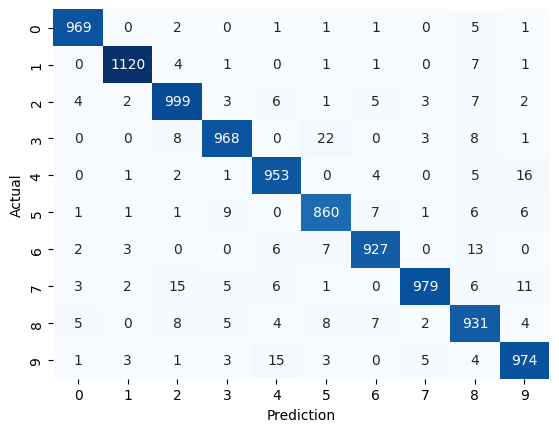

time: 848 ms (started: 2024-07-08 04:08:14 +00:00)


In [59]:
print_metrics(y_test_o,y_pred)

# 테스트 시각화

In [60]:
X_test.shape

(10000, 28, 28)

time: 10.5 ms (started: 2024-07-08 04:08:23 +00:00)


In [61]:
sample = np.random.randint(10000,size=25)

time: 9.35 ms (started: 2024-07-08 04:08:35 +00:00)


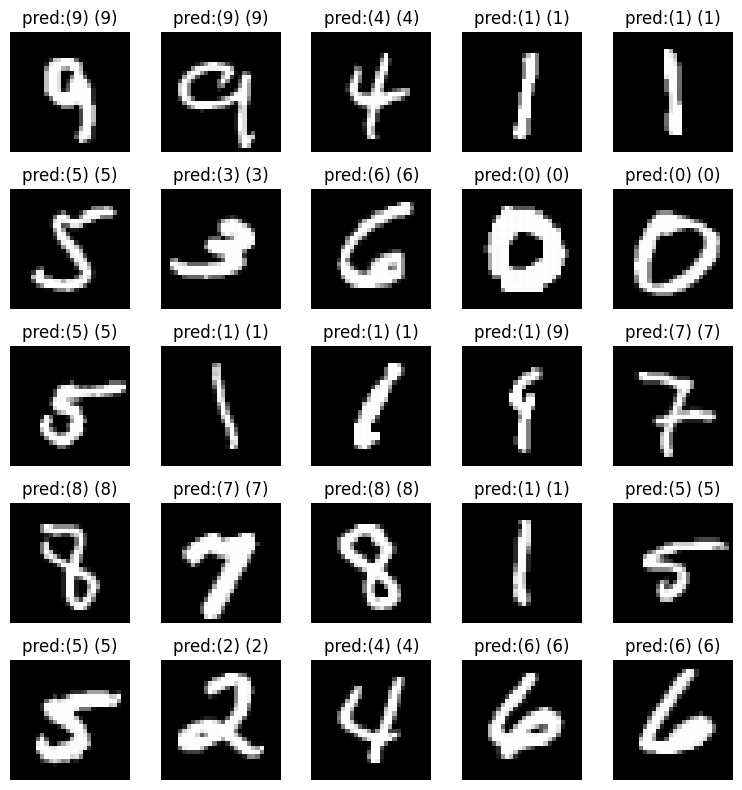

time: 4.06 s (started: 2024-07-08 04:08:35 +00:00)


In [62]:
plt.figure(figsize=(8,8))
for i, idx in enumerate(sample):
  plt.subplot(5, 5,i+1) # 25개 grid
  plt.imshow(X_test[idx],cmap='gray')
  plt.title(f'pred:({y_pred[idx]}) ({y_test[idx]})') # 정답값 표시
  plt.axis('off')
  plt.tight_layout()
plt.show()


## 결론

*   상당히 좋은 성능을 보여줬다.
*   하이퍼 파라미터 튜닝 및 얼리스타핑 기능을 추가해 보는 것도 좋을 것 같다.

